In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path

import matplotlib.pyplot as plt


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified

data_folder = "D:/analyze_Pearson_residuals/"

data_subfolder = "33k_PBMC"

data_path = Path ( data_folder + data_subfolder )


import sys
sys.path.append( data_folder )

from  plot_tab_utilities import *

In [3]:
# output plots
Lg_plot_jpg = data_subfolder + "_Figure_3.jpg"
Sg_plot_jpg = data_subfolder + "_Figure_5.jpg"

# input data
nru_dict_pkl =  "nru_dict.pkl"
scanpy_variance_pkl = "residual_variance_scanpy.pkl"
SCT_variance_pkl = "SCT_v2_residual_variance.pkl"


# paths: output plots
Lg_plot_dsn = data_path / Lg_plot_jpg
Sg_plot_dsn = data_path / Sg_plot_jpg

# paths: input data
nru_dict_dsn = data_path / nru_dict_pkl
scanpy_variance_dsn = data_path / scanpy_variance_pkl
SCT_variance_dsn = data_path / SCT_variance_pkl

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]	

bins_500 = [ 0, 20, 50, 100, 200, 500, 1e6]
labels_500 = ['1-20', '21-50', '51-100', '101-200', '201-500', '501+']

In [5]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]
df_gene_stats.insert ( 3, 'rank_A_g', df_gene_stats['A_g'].rank ( ascending=False ) )

print ( '\n\n df_gene_stats'  )
print ( df_gene_stats  )
print ( '\n\n df_gene_stats.describe' )
print ( df_gene_stats.describe ( percentiles=pctl_list ) )



 df_gene_stats
                 nz_cells         M_g         A_g  rank_A_g
ENSG00000254709      1679  594.080034  321.476696       1.0
ENSG00000163736       679   85.392337   78.464313       2.0
ENSG00000087086     32296   43.064119   42.226038       3.0
ENSG00000163220     10159   36.166104   34.965024       4.0
ENSG00000090382     15500   34.801999   34.258216       5.0
...                   ...         ...         ...       ...
ENSG00000171241        56    0.599725    0.599725   12317.0
ENSG00000149573        63    0.722642    0.599725   12317.0
ENSG00000122025       124    0.651807    0.599725   12317.0
ENSG00000237980        52    0.682438    0.599725   12317.0
ENSG00000158488        73    0.666333    0.599725   12317.0

[12324 rows x 4 columns]


 df_gene_stats.describe
           nz_cells           M_g           A_g     rank_A_g
count  12324.000000  12324.000000  12324.000000  12324.00000
mean    2052.230932      1.475133      1.140886   6162.50000
std     4237.861447      5.5

In [6]:
df_Lg = pd.read_pickle ( scanpy_variance_dsn ).rename( columns={'CLIPPED':'L_g'} )
df_Lg.insert ( 2, 'rank_L_g', df_Lg['L_g'].rank ( ascending=False ) )
df_Lg.insert ( 3, 'clipping_effect', ( ~ ( df_Lg['L_g'] == df_Lg['UNCLIPPED'] ) ).astype(int) )

print ( '\n\n df_Lg'  )
print ( df_Lg  )
print ( '\n\n df_Lg.describe' )
print ( df_Lg.describe ( percentiles=pctl_list ) )

print (  '\n\n df_Lg[clipping_effect].sum() \n\n', df_Lg['clipping_effect'].sum()  )



 df_Lg
                       L_g   UNCLIPPED  rank_L_g  clipping_effect
ENSG00000254709  16.208453  575.773651      14.0                1
ENSG00000163736  63.909458   85.236894       1.0                1
ENSG00000087086  32.692607   32.692607       3.0                0
ENSG00000163220  33.945418   33.945418       2.0                0
ENSG00000090382  30.883432   30.883432       4.0                0
...                    ...         ...       ...              ...
ENSG00000171241   0.599552    0.599552   12324.0                0
ENSG00000149573   0.722545    0.722545   12304.0                0
ENSG00000122025   0.651422    0.651422   12321.0                0
ENSG00000237980   0.682376    0.682376   12315.0                0
ENSG00000158488   0.666108    0.666108   12319.0                0

[12324 rows x 4 columns]


 df_Lg.describe
                L_g     UNCLIPPED      rank_L_g  clipping_effect
count  12324.000000  12324.000000  12324.000000     12324.000000
mean       1.377470      

In [7]:
df_Sg = pd.read_pickle ( SCT_variance_dsn ).rename( columns={'residual_variance':'S_g'} )
df_Sg.insert ( 1, 'rank_S_g', df_Sg['S_g'].rank ( ascending=False ) )

print ( '\n\n df_Sg'  )
print ( df_Sg  )
print ( '\n\n df_Sg.describe' )
print ( df_Sg.describe ( percentiles=pctl_list ) )



 df_Sg
                       S_g  rank_S_g
ENSG00000254709  55.030621       6.0
ENSG00000163736  96.260369       1.0
ENSG00000087086  36.795248       8.0
ENSG00000163220  79.028298       3.0
ENSG00000090382  66.168486       4.0
...                    ...       ...
ENSG00000171241   0.039641   12271.0
ENSG00000149573   0.052637   11875.0
ENSG00000122025   0.135192   10307.0
ENSG00000237980   0.040471   12253.0
ENSG00000158488   0.081889   11167.0

[12324 rows x 2 columns]


 df_Sg.describe
                S_g      rank_S_g
count  12324.000000  12324.000000
mean       0.779663   6162.500000
std        1.951689   3557.776693
min        0.035810      1.000000
1%         0.041926    124.230000
5%         0.058134    617.150000
10%        0.085970   1233.300000
25%        0.224394   3081.750000
50%        0.654004   6162.500000
75%        1.083653   9243.250000
90%        1.328464  11091.700000
95%        1.516403  11707.850000
99%        2.454294  12200.770000
max       96.260369  12324.

In [8]:
df_compare_Lg = pd.concat ( [ df_gene_stats, df_Lg], axis=1, sort=False )
df_compare_Lg.insert ( 8, '_rank_A_g_', pd.cut ( df_compare_Lg['rank_A_g'], bins_500, labels=labels_500 ) )
df_compare_Lg.insert ( 9, '_rank_L_g_', pd.cut ( df_compare_Lg['rank_L_g'], bins_500, labels=labels_500 ) )

pd.set_option('display.max_columns', 9)
print ( '\n\n df_compare_Lg'  )
print ( df_compare_Lg  )
print ( '\n\n df_compare_Lg.describe' )
print ( df_compare_Lg.describe ( percentiles=pctl_list ) )

pti_Lg = pv_table_noprint_margins ( df_compare_Lg, '_rank_A_g_', '_rank_L_g_' )
print ( '\n\n Table \n relation between ranks of Ag and Lg\n' )
print ( pti_Lg )



 df_compare_Lg
                 nz_cells         M_g         A_g  rank_A_g  ...  rank_L_g  \
ENSG00000254709      1679  594.080034  321.476696       1.0  ...      14.0   
ENSG00000163736       679   85.392337   78.464313       2.0  ...       1.0   
ENSG00000087086     32296   43.064119   42.226038       3.0  ...       3.0   
ENSG00000163220     10159   36.166104   34.965024       4.0  ...       2.0   
ENSG00000090382     15500   34.801999   34.258216       5.0  ...       4.0   
...                   ...         ...         ...       ...  ...       ...   
ENSG00000171241        56    0.599725    0.599725   12317.0  ...   12324.0   
ENSG00000149573        63    0.722642    0.599725   12317.0  ...   12304.0   
ENSG00000122025       124    0.651807    0.599725   12317.0  ...   12321.0   
ENSG00000237980        52    0.682438    0.599725   12317.0  ...   12315.0   
ENSG00000158488        73    0.666333    0.599725   12317.0  ...   12319.0   

                 clipping_effect  _rank_A_g_  

In [9]:
df_compare_Sg = pd.concat ( [ df_gene_stats, df_Sg], axis=1, sort=False )
df_compare_Sg.insert ( 6, '_rank_A_g_', pd.cut ( df_compare_Sg['rank_A_g'], bins_500, labels=labels_500 ) )
df_compare_Sg.insert ( 7, '_rank_S_g_', pd.cut ( df_compare_Sg['rank_S_g'], bins_500, labels=labels_500 ) )

print ( '\n\n df_compare_Sg'  )
print ( df_compare_Sg  )
print ( '\n\n df_compare_Sg.describe' )
print ( df_compare_Sg.describe ( percentiles=pctl_list ) )

pti_Sg = pv_table_noprint_margins ( df_compare_Sg, '_rank_A_g_', '_rank_S_g_' )
print ( '\n\n Table \n relation between ranks of Ag and Sg\n' )
print ( pti_Sg )



 df_compare_Sg
                 nz_cells         M_g         A_g  rank_A_g        S_g  \
ENSG00000254709      1679  594.080034  321.476696       1.0  55.030621   
ENSG00000163736       679   85.392337   78.464313       2.0  96.260369   
ENSG00000087086     32296   43.064119   42.226038       3.0  36.795248   
ENSG00000163220     10159   36.166104   34.965024       4.0  79.028298   
ENSG00000090382     15500   34.801999   34.258216       5.0  66.168486   
...                   ...         ...         ...       ...        ...   
ENSG00000171241        56    0.599725    0.599725   12317.0   0.039641   
ENSG00000149573        63    0.722642    0.599725   12317.0   0.052637   
ENSG00000122025       124    0.651807    0.599725   12317.0   0.135192   
ENSG00000237980        52    0.682438    0.599725   12317.0   0.040471   
ENSG00000158488        73    0.666333    0.599725   12317.0   0.081889   

                 rank_S_g _rank_A_g_ _rank_S_g_  
ENSG00000254709       6.0       1-20       1

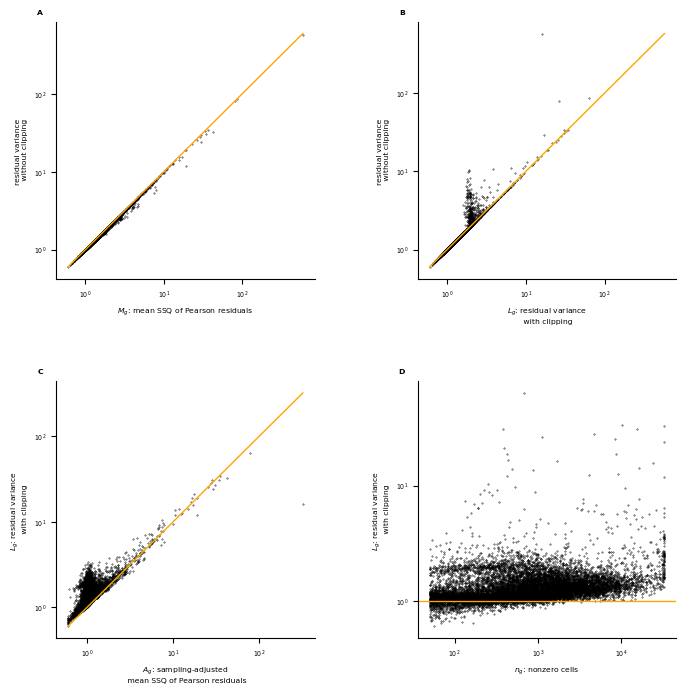

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )

plot_ax ( df_compare_Lg, ax1, 'A', 'M_g', 'UNCLIPPED','$M_g$: mean SSQ of Pearson residuals',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax2, 'B', 'L_g', 'UNCLIPPED','$L_g$: residual variance \n with clipping',  'residual variance \n without clipping' )
plot_ax ( df_compare_Lg, ax3, 'C', 'A_g', 'L_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$L_g$: residual variance \n with clipping' )
plot_ax ( df_compare_Lg, ax4, 'D', 'nz_cells', 'L_g', '$n_g$: nonzero cells',  '$L_g$: residual variance \n with clipping', line_slope='horizontal' )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( Lg_plot_dsn, transparent=True, dpi=300 ) 

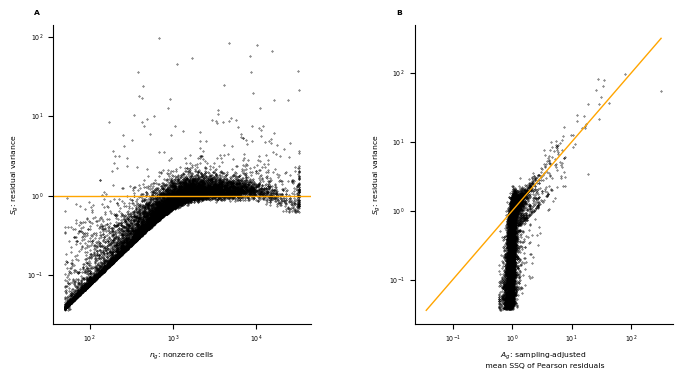

In [11]:
fig, (ax1, ax2)  = plt.subplots(1,2, figsize=( 8., 4.4 ) )

plot_ax ( df_compare_Sg, ax1, 'A',  'nz_cells', 'S_g', '$n_g$: nonzero cells',   '$S_g$: residual variance', line_slope='horizontal'  )
plot_ax ( df_compare_Sg, ax2, 'B', 'A_g', 'S_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals',  '$S_g$: residual variance'  )

plt.subplots_adjust( bottom=0.2, wspace=0.4 )

plt.savefig( Sg_plot_dsn, transparent=True, dpi=300 ) 